In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('datasets\clean_data\mining_gender.csv')
data.head()

,Date,Sex,Location,Employed full-time ('000),Employed part-time ('000)
0,2002,Males,NSW,1.391635,0.000000
1,2002,Males,NSW,13.439175,0.000000
2,2002,Males,VIC,1.198881,0.354086
3,2002,Males,VIC,2.776364,0.000000
4,2002,Males,QLD,3.029516,0.266453


In [3]:
X = data[["Employed full-time ('000)"]]
y = data["Date"].values.reshape(-1, 1)
print(X.shape, y.shape)


(1783, 1) (1783, 1)


In [4]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Sex"])
data_binary_encoded.head()

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [5]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler

NameError: name 'X_scaler' is not defined

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

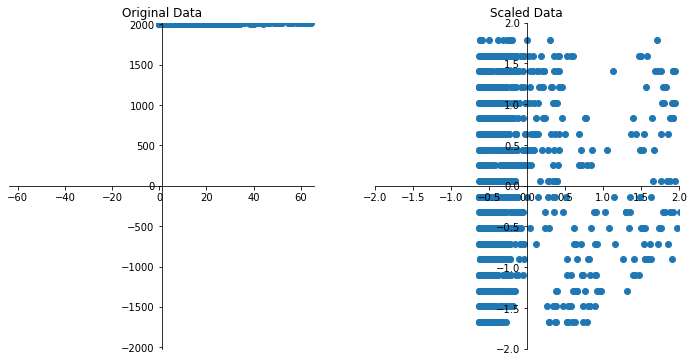

In [8]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Employed full-time ('000)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Employed full-time ('000)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [9]:
X = pd.get_dummies(data[["Employed full-time ('000)"]])
y = data["Date"].values.reshape(-1, 1)
X.head()

KeyError: 'Date'

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

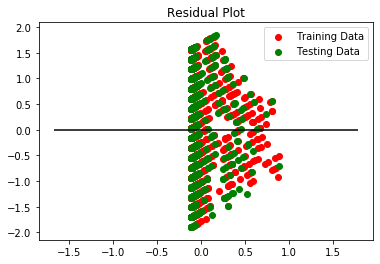

In [12]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.00155719445285, R2: 0.015397003049438696


In [14]:
predictions

array([[-0.10755803],
       [-0.04317945],
       [ 0.13449742],
       [ 0.19092042],
       [-0.10613378],
       [-0.09110081],
       [-0.01878996],
       [-0.10426099],
       [-0.09790802],
       [ 0.06367493],
       [-0.11065425],
       [-0.074548  ],
       [-0.10849957],
       [-0.01784824],
       [ 0.06079153],
       [-0.04104657],
       [ 0.16534004],
       [-0.03914954],
       [ 0.88377239],
       [-0.1005014 ],
       [-0.10723038],
       [ 0.11586922],
       [-0.04654013],
       [-0.05386844],
       [-0.04519381],
       [-0.061149  ],
       [-0.02207998],
       [-0.04178058],
       [ 0.20466749],
       [ 0.00543587],
       [-0.08161644],
       [-0.10262883],
       [-0.09627353],
       [-0.10253028],
       [-0.07115296],
       [-0.09635912],
       [-0.04005653],
       [-0.06379313],
       [-0.04735713],
       [-0.09240386],
       [-0.10027109],
       [-0.10337921],
       [ 0.04092877],
       [-0.03806098],
       [-0.11104776],
       [-0